In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.stats import norm
from scipy import stats
import seaborn as sns
from scipy.stats import pearsonr
from itertools import combinations
from tqdm import tqdm

### DATASET

In [2]:
df = pd.read_csv('PREZZI.csv', sep=',').transpose()

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,733,734,735,736,737,738,739,740,741,742
A2A,1.3045,1.331,1.3175,1.340,1.3400,1.3375,1.3315,1.305,1.335,1.3280,...,1.730,1.7535,1.7465,1.7575,1.771,1.797,1.7925,1.7915,1.7895,1.7865
ABITARE IN,4.8100,4.830,4.7100,4.860,4.8600,4.8300,4.8600,4.900,4.920,4.9100,...,5.180,5.1800,5.1400,5.0400,5.000,5.060,5.0800,5.1800,5.0600,5.0000
ACEA,17.1500,17.180,17.0100,17.310,17.0700,17.2200,17.2500,17.240,17.360,17.3900,...,11.100,11.0000,11.0000,11.2700,11.370,11.590,11.6700,11.8500,11.6100,11.4500
AEFFE,1.1040,1.086,1.0700,1.118,1.1520,1.1640,1.1220,1.102,1.110,1.1120,...,0.734,0.7310,0.7330,0.7440,0.745,0.742,0.8000,0.8050,0.8140,0.8190
AEROP GUGL MARCO,8.4800,8.360,8.5200,8.520,8.4600,8.3400,8.5000,8.500,8.240,8.3800,...,8.060,8.0200,8.1000,8.1200,8.100,8.140,8.1200,8.1200,8.0800,8.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALSOIA,13.1500,13.250,13.1500,13.350,13.3000,13.1000,13.2000,13.350,13.400,13.3000,...,8.520,8.4000,8.3800,8.3000,8.400,8.400,8.4200,8.4800,8.3800,8.5400
WEBUILD,1.1820,1.156,1.1770,1.217,1.2770,1.2660,1.2380,1.261,1.258,1.2640,...,1.611,1.6150,1.6310,1.6630,1.702,1.716,1.7800,1.8070,1.7210,1.7190
WIIT,16.3000,16.800,16.6000,16.350,16.1500,16.0000,15.9500,15.850,15.400,15.6000,...,14.520,14.4800,14.5200,14.4800,14.780,15.280,15.3800,16.0600,15.7800,16.0000
ZIGNAGO VETRO,13.6800,13.780,13.8600,13.660,13.5600,13.3400,13.4600,13.680,13.500,13.7800,...,12.220,12.2400,12.2600,12.4200,12.360,12.360,12.4000,12.6600,12.7000,13.4000


In [4]:
#Create a column Daily_price that contains the list of prices for each stock

df["Daily_price"] = df.values.tolist()

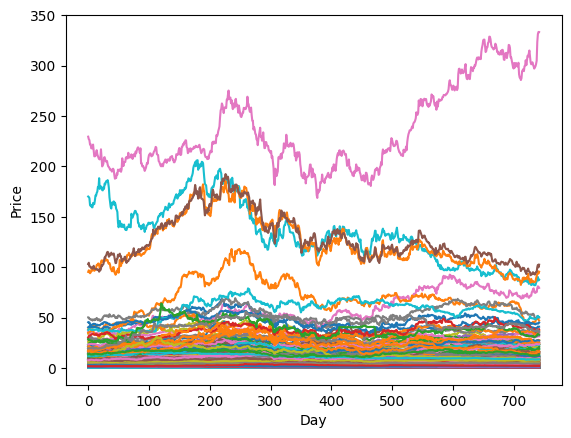

In [5]:
#Have a look at the prices during time

for row in df['Daily_price']:
    plt.plot(row)

plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

* Returns

In [6]:
#Define the logarithm of return

def Returns(prices):
    prices = np.array(prices)
    log_returns = np.log(prices[1:] / prices[:-1])
    return log_returns.tolist()

In [7]:
#Create a column Log_return that contains the list of returns for each stock

df['Log_return'] = df['Daily_price'].apply(Returns)

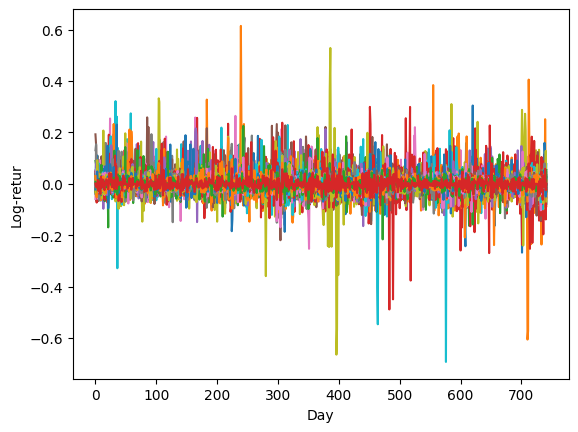

In [8]:
#Look at the log of the returns

for row in df['Log_return']:
    plt.plot(row)

plt.xlabel('Day')
plt.ylabel('Log-retur')
plt.show()

In [9]:
#Now the Dataframe looks...

df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,735,736,737,738,739,740,741,742,Daily_price,Log_return
A2A,1.3045,1.331,1.3175,1.340,1.340,1.3375,1.3315,1.305,1.335,1.328,...,1.7465,1.7575,1.771,1.7970,1.7925,1.7915,1.7895,1.7865,"[1.3045, 1.331, 1.3175, 1.34, 1.34, 1.3375, 1....","[0.020110713818328557, -0.010194537979594277, ..."
ABITARE IN,4.8100,4.830,4.7100,4.860,4.860,4.8300,4.8600,4.900,4.920,4.910,...,5.1400,5.0400,5.000,5.0600,5.0800,5.1800,5.0600,5.0000,"[4.81, 4.83, 4.71, 4.86, 4.86, 4.83, 4.86, 4.9...","[0.004149383546811618, -0.025158559636154987, ..."
ACEA,17.1500,17.180,17.0100,17.310,17.070,17.2200,17.2500,17.240,17.360,17.390,...,11.0000,11.2700,11.370,11.5900,11.6700,11.8500,11.6100,11.4500,"[17.15, 17.18, 17.01, 17.31, 17.07, 17.22, 17....","[0.0017477429441605384, -0.00994451014833884, ..."
AEFFE,1.1040,1.086,1.0700,1.118,1.152,1.1640,1.1220,1.102,1.110,1.112,...,0.7330,0.7440,0.745,0.7420,0.8000,0.8050,0.8140,0.8190,"[1.104, 1.086, 1.07, 1.118, 1.152, 1.164, 1.12...","[-0.016438726343159835, -0.014842573037928852,..."
AEROP GUGL MARCO,8.4800,8.360,8.5200,8.520,8.460,8.3400,8.5000,8.500,8.240,8.380,...,8.1000,8.1200,8.100,8.1400,8.1200,8.1200,8.0800,8.0200,"[8.48, 8.36, 8.52, 8.52, 8.46, 8.34, 8.5, 8.5,...","[-0.014252022707201615, 0.018957913744614207, ..."
ALERION CLEAN POWER,10.6000,12.850,15.0000,14.900,14.950,14.6500,13.7000,13.800,13.600,12.950,...,22.7000,22.8500,23.350,23.2000,23.7000,23.9000,23.4000,23.6000,"[10.6, 12.85, 15.0, 14.9, 14.95, 14.65, 13.7, ...","[0.19248981022320735, 0.15470638976098133, -0...."
ALGOWATT,0.3420,0.341,0.3400,0.344,0.338,0.3430,0.3440,0.340,0.340,0.337,...,0.3130,0.3130,0.313,0.3155,0.3205,0.3200,0.3150,0.3130,"[0.342, 0.341, 0.34, 0.344, 0.338, 0.343, 0.34...","[-0.002928259779088334, -0.0029368596733097135..."
ALKEMY,7.0800,7.040,6.9200,6.900,6.840,7.1000,7.0000,7.000,6.940,6.880,...,6.9500,6.8000,7.000,7.1000,7.2200,7.3100,7.2200,7.3700,"[7.08, 7.04, 6.92, 6.9, 6.84, 7.1, 7.0, 7.0, 6...","[-0.00566573753567742, -0.017192400540372875, ..."
AMPLIFON,34.0400,33.940,33.5600,33.020,32.680,33.8400,33.6800,33.620,33.910,34.160,...,25.7600,25.3800,26.640,26.5000,27.5300,27.7000,27.7600,27.6400,"[34.04, 33.94, 33.56, 33.02, 32.68, 33.84, 33....","[-0.0029420438990931815, -0.011259378207074639..."
ANIMA HOLDING,3.8820,3.926,3.9040,4.034,4.080,4.1140,4.1600,4.220,4.142,4.092,...,3.8400,3.8280,3.856,3.8060,3.8640,4.0700,3.8880,3.9140,"[3.882, 3.926, 3.904, 4.034, 4.08, 4.114, 4.16...","[0.011270611107450791, -0.0056194273034232975,..."


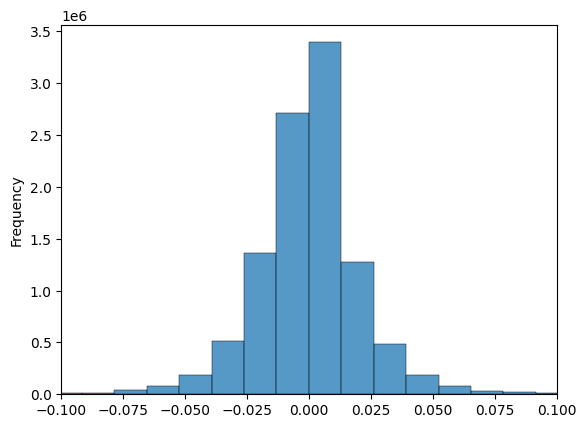

In [10]:
#Let's inspect the distribution of log returns

log_return_flattened = []

for i in range(df.shape[0]):
    element = df.iloc[i]['Log_return']
    log_return_flattened += element
    

sns.histplot(log_return_flattened, kde=False, stat='frequency', bins=100)
plt.xlim(-0.1, 0.1)
plt.show()

mu : -0.00011442001639805088, std : 0.023308555637458466
skewness: -0.04831156994583768
kurtosis: 44.98069253023825


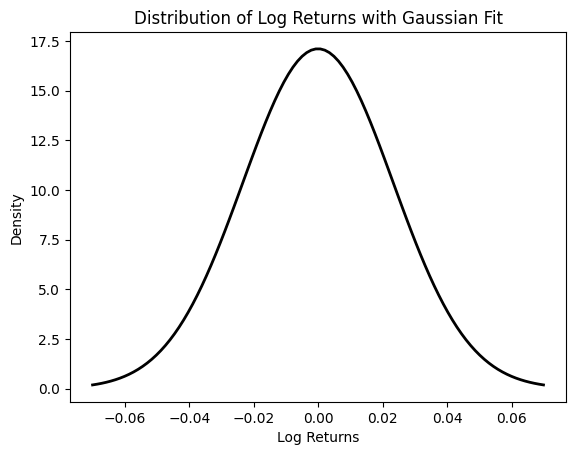

In [11]:
#Log returns follow a gaussian distribution

mu, std = norm.fit(log_return_flattened)
xmin, xmax = plt.xlim()
x = np.linspace(mu - 3 * std, mu + 3 * std, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Distribution of Log Returns with Gaussian Fit")
plt.xlabel("Log Returns")
plt.ylabel("Density")
print(f"mu : {mu}, std : {std}")

skewness = stats.skew(log_return_flattened)
kurtosis = stats.kurtosis(log_return_flattened)
print(f"skewness: {skewness}")
print(f"kurtosis: {kurtosis}")

* Correlation coefficient

In [12]:
#Define the Pearson correlation coefficient

def correlation_coefficient(series1, series2):
    correlation, p_value = pearsonr(series1, series2)
    return correlation

def correlation_in_windows(series1, series2, window_size):
    num_windows = len(series1) // window_size
    correlations = []

    for i in range(num_windows):
        start_idx = i * window_size
        end_idx = start_idx + window_size

        window1 = series1[start_idx:end_idx]
        window2 = series2[start_idx:end_idx]

        correlation = correlation_coefficient(window1,window2)
        correlations.append(correlation)

    return np.sum(correlations)/len(correlations)

In [15]:
#Generate all the combinations of couples of Log_return
couples = list(combinations(df['Log_return'], 2))

#Create a column Correlation_coefficients which is a list of dictionaries
df['Correlation_coefficients'] = [{} for _ in range(len(df))]

# Compute the correlation coefficient for each couple and store the value in the dictionary
for (idx1, list1), (idx2, list2) in tqdm(combinations(df['Log_return'].items(), 2)):
    coeff = correlation_coefficient(list1, list2)
    #coeff = correlation_in_windows(list1, list2, 63)
    df.loc[idx1, 'Correlation_coefficients'][str(idx2)] = coeff
    df.loc[idx2, 'Correlation_coefficients'][str(idx1)] = coeff

16836it [00:04, 3744.66it/s]


In [16]:
#Each row of Correlation_coefficients looks...

print(df.iloc[0]['Correlation_coefficients'])

{'ABITARE IN': 0.17931521989991742, 'ACEA': 0.637114678478924, 'AEFFE': 0.3195558485617619, 'AEROP GUGL MARCO': 0.1809998625927421, 'ALERION CLEAN POWER': 0.2936832575895854, 'ALGOWATT': 0.15366841331256412, 'ALKEMY': 0.21744371808646784, 'AMPLIFON': 0.3414995215435041, 'ANIMA HOLDING': 0.44860973025030015, 'ANTARES VISION': 0.10633672010151156, 'AQUAFIL': 0.25659956488254504, 'ASCOPIAVE': 0.4690599378075542, 'AUTOSTRADE MERIDIONALI': 0.14113097918427947, 'AVIO': 0.14261601182926176, 'AZIMUT HOLDING': 0.5077062790211567, 'BANCA GENERALI': 0.4470974608813348, 'BANCA IFIS': 0.40776865188471695, 'BANCA MEDIOLANUM': 0.46886819947747777, 'BANCA MONTE DEI PASCHI': 0.1199614535047143, 'BANCA SISTEMA': 0.31538764192768864, 'BANCO BPM': 0.36038299314104966, 'BASICNET': 0.1631682914433816, 'BASTOGI': 0.047987937646495865, 'BANCA PPO.DI SONDRIO': 0.35627657904465865, 'BANCA PROFILO': 0.2472911726777342, 'BEEWIZE': 0.08306644037563729, 'BEGHELLI': 0.08922545496326716, 'BFF BANK': 0.268644294682015

<AxesSubplot: ylabel='Frequency'>

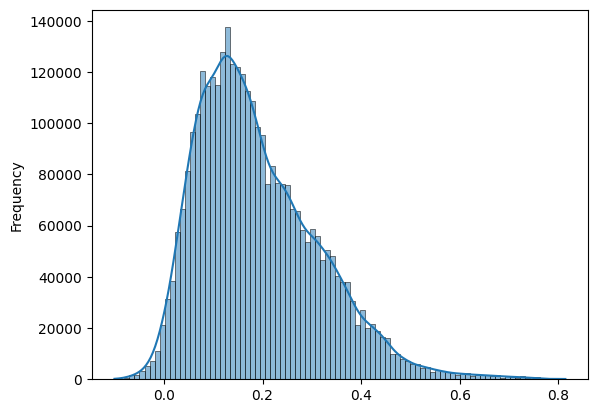

In [17]:
#Let's inspect the distribution of correlation coefficients

cc_flattened = []

for i in range(df.shape[0]):
    element = list(df.iloc[i]['Correlation_coefficients'].values())
    cc_flattened += element
    
sns.histplot(cc_flattened, kde=True, stat='frequency')

In [18]:
#Compute deciles of the correlation coefficient

l = []
for i in range(df.shape[0]):
    l.append(list(df.iloc[i]['Correlation_coefficients'].values()))
flat_l = [item for sublist in l for item in sublist]

sorted_coefficient = sorted(flat_l)
n = len(sorted_coefficient)

decili = [sorted_coefficient[int((n/10)*i)] for i in range(1, 10)]
print(decili)

[0.05267076721424906, 0.08404709767555309, 0.11301578662035984, 0.1386935183556269, 0.1670861216461497, 0.19877679692766703, 0.24072672091595856, 0.29165233999411266, 0.3591605359437259]


In [19]:
#Choose thresholds for the correlation coefficient for constructing graphs

LOW_THRESHOLD = decili[0]
MID_THRESHOLD = decili[1]
HIGH_THRESHOLD = decili[8]

### NETWORKS 

In [20]:
#Function for building graphs

def build_graph(df, name):
      G = nx.Graph() 
      G.graph['name'] = name
      index = 0
      if name == "High correlation graph":
        for node in df.index:
          for connected_node, weight in df.iloc[index]['Correlation_coefficients'].items():
            if weight >= HIGH_THRESHOLD:
              G.add_node(node)
              G.add_edge(node, connected_node, weight=weight)
          index += 1
      elif name == "Low correlation graph":
        for node in df.index:
          for connected_node, weight in df.iloc[index]['Correlation_coefficients'].items():
            if weight > LOW_THRESHOLD and weight <= MID_THRESHOLD:
              G.add_node(node)
              G.add_edge(node, connected_node, weight=weight)
          index += 1
      elif name == "Low-negative correlation graph":
        for node in df.index:
          for connected_node, weight in df.iloc[index]['Correlation_coefficients'].items():
            if weight <= LOW_THRESHOLD:
              G.add_node(node)
              G.add_edge(node, connected_node, weight=weight)
          index += 1
      else:
        print("Wrong graph's name")
        
      return G

In [21]:
#Our three graphs are...

HG = build_graph(df, "High correlation graph")
LG = build_graph(df, "Low correlation graph")
NG = build_graph(df, "Low-negative correlation graph")
GRAPHS = [HG, LG, NG]

The graph contains 110 nodes


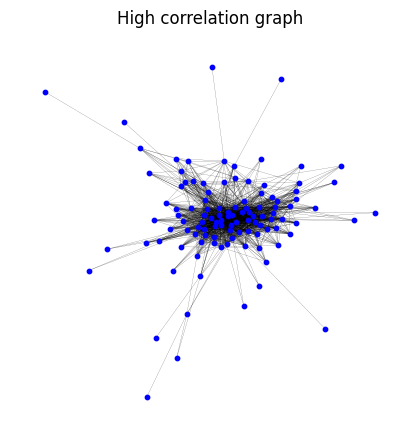

The graph contains 184 nodes


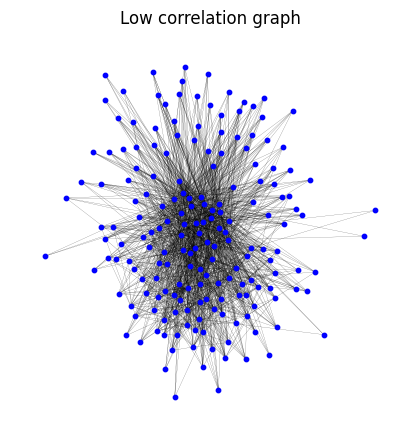

The graph contains 184 nodes


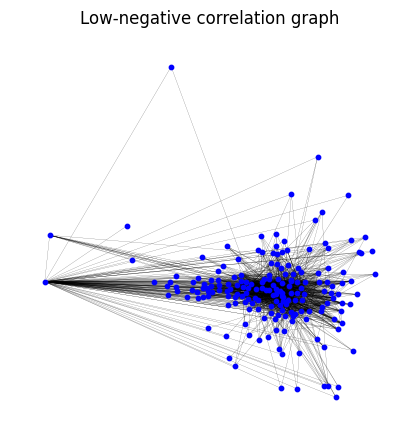

In [22]:
#Network visualization

for G in GRAPHS:
    
    print(f"The graph contains {nx.number_of_nodes(G)} nodes")
    plt.figure(figsize=(4, 4))
    nx.draw(G, with_labels=False, node_color='blue', node_size=10, font_size=8, width=0.1)
    plt.title(G.graph['name'])
    plt.show()

* Degree distribution

Slope for High correlation graph is -0.2972095092330174
r_value is -0.5045335928608319
p_value is 7.339996133222511e-05


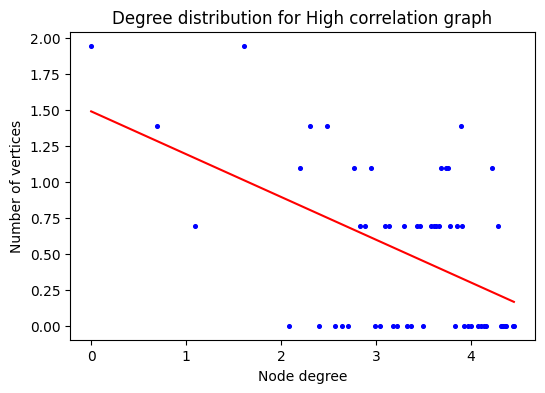

Slope for Low correlation graph is -0.6637586582418767
r_value is -0.6782755608281826
p_value is 8.559974989075192e-08


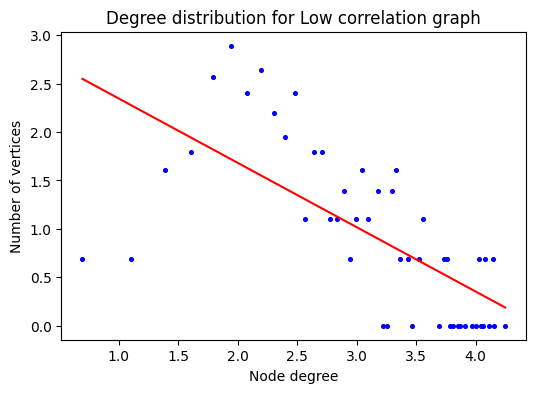

Slope for Low-negative correlation graph is -0.6327851841832057
r_value is -0.7643313337945299
p_value is 6.358872237918231e-10


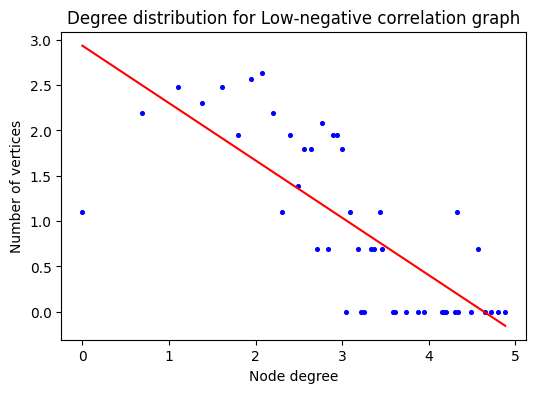

In [23]:
#Degree distribution with linear regression (logaritmic scale) -> POWER-LAW DISTRIBUTION

for G in GRAPHS:
    
    counts = nx.degree_histogram(G)
    degrees = [i for i in range(len(counts)) if counts[i] != 0]
    counts = [count for count in counts if count != 0]
    
    log_counts = np.log(counts)
    log_degrees = np.log(degrees)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_degrees, log_counts)
    
    #equation = f'y = {slope:.2f} * x + {intercept:.2f}'
    print(f"Slope for {G.graph['name']} is {slope}")
    print(f"r_value is {r_value}")
    print(f"p_value is {p_value}")
    
    plt.figure(figsize=(6, 4))
    plt.title(f"Degree distribution for {G.graph['name']}")   
    plt.scatter(log_degrees, log_counts, color='b',s=7)
    plt.plot(log_degrees, slope*log_degrees + intercept, color='r') #label=equation
    plt.xlabel('Node degree')
    plt.ylabel('Number of vertices')
    #plt.legend()
    plt.show()


* Edge density and clustering coefficient

In [24]:
for G in GRAPHS:
    
    print(G.graph['name'])
    edge_density = nx.density(G)
    print(f"\tEdge density: {edge_density}")
    
    clustering_coefficient = nx.average_clustering(G)
    print(f"\tClustering coefficient: {clustering_coefficient}")
    
    print("-------------")

High correlation graph
	Edge density: 0.2809007506255213
	Clustering coefficient: 0.7378098352892908
-------------
Low correlation graph
	Edge density: 0.10002375861249703
	Clustering coefficient: 0.21816286482221478
-------------
Low-negative correlation graph
	Edge density: 0.10002375861249703
	Clustering coefficient: 0.591015733801835
-------------


* Highest degree nodes

In [26]:
#Which are the nodes with the highest degree?

for G in GRAPHS:
    
    print(G.graph['name'])
    degrees = dict(G.degree())
    sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    print(f"\tThe nodes with the highest degree are: {sorted_degrees[0:10]}")
    print("-------------")

High correlation graph
	The nodes with the highest degree are: [('POSTE ITALIANE', 86), ('AZIMUT HOLDING', 85), ('INTESA SANPAOLO', 79), ('BANCA GENERALI', 78), ('BANCA MEDIOLANUM', 77), ('INTERPUMP GROUP', 76), ('ANIMA HOLDING', 75), ('STELLANTIS', 73), ('TAMBURI INV.PARTNERS', 73), ('BANCA IFIS', 68)]
-------------
Low correlation graph
	The nodes with the highest degree are: [('RESTART', 70), ('BIOERA', 64), ('FIDIA', 63), ('BASTOGI', 63), ('CELLULARLINE', 61), ('CONAFI', 59), ('GEQUITY', 59), ('BEEWIZE', 58), ('SOFTLAB', 57), ('ENERVIT', 56)]
-------------
Low-negative correlation graph
	The nodes with the highest degree are: [('GAS PLUS', 132), ('NETWEEK', 121), ('CIA', 112), ('ENERVIT', 104), ('FIDIA', 96), ('CONAFI', 96), ('BASTOGI', 89), ('CELLULARLINE', 77), ('BIOERA', 76), ('GEQUITY', 76)]
-------------


* Betweeness centrality

In [27]:
#Which are the nodes with the highest betweenness centrality?

for G in GRAPHS:
    
    print(G.graph['name'])
    betweenness_centrality = nx.betweenness_centrality(G)
    sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    print(f"\tThe nodes with the highest betweenness centrality are: {sorted_betweenness_centrality[0:5]}")
    print("-------------")

High correlation graph
	The nodes with the highest betweenness centrality are: [('POSTE ITALIANE', 0.08682350458603916), ('AZIMUT HOLDING', 0.060542789637605746), ('INTESA SANPAOLO', 0.054850170172839004), ('ANIMA HOLDING', 0.04546613623343892), ('INTERPUMP GROUP', 0.041707526002215105)]
-------------
Low correlation graph
	The nodes with the highest betweenness centrality are: [('RESTART', 0.0619262992072298), ('BIOERA', 0.05042978993459646), ('FIDIA', 0.049086118953422284), ('CELLULARLINE', 0.046084960617641675), ('BASTOGI', 0.04500018946978814)]
-------------
Low-negative correlation graph
	The nodes with the highest betweenness centrality are: [('GAS PLUS', 0.19144722237981926), ('NETWEEK', 0.12319326010596102), ('CIA', 0.0815671860110888), ('ENERVIT', 0.07885858463210826), ('FIDIA', 0.06266507461468913)]
-------------


* Plot of the local clustering coefficient as function of degree

High correlation graph


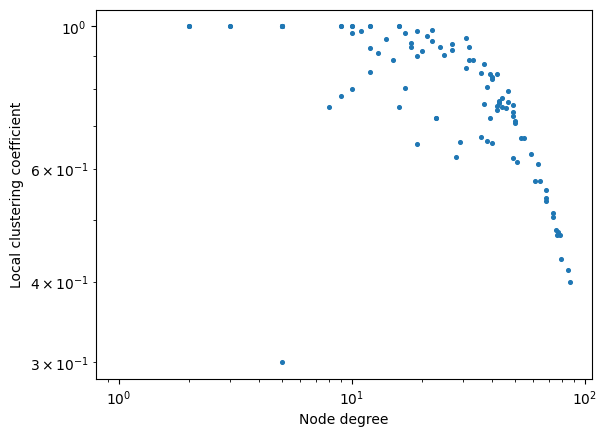

Low correlation graph


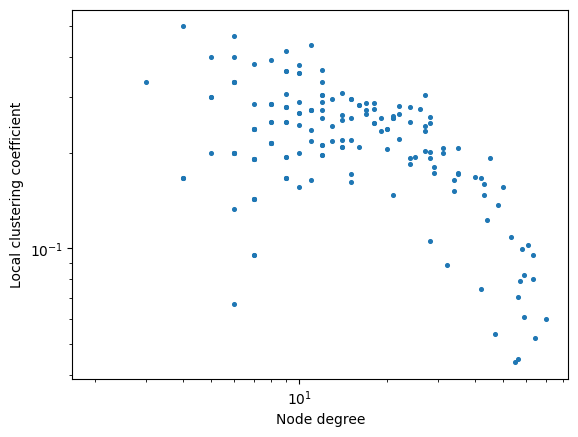

Low-negative correlation graph


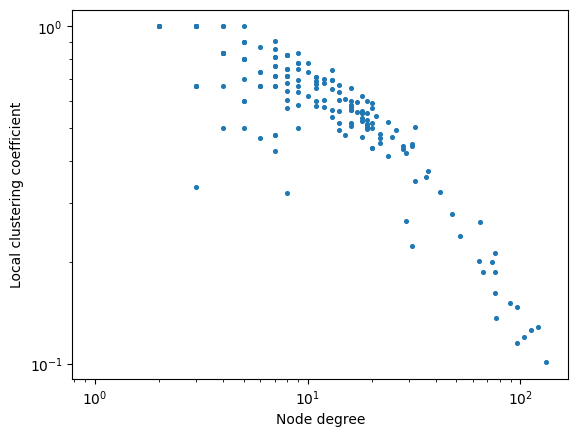

In [28]:
for G in GRAPHS:
    
    print(G.graph['name'])
    degrees = dict(G.degree())
    clustering_coefficients = nx.clustering(G)
    average_clustering_coefficients = []
    
    for node, degree in degrees.items():
        average_clustering_coefficients.append((degree, clustering_coefficients[node]))
    average_clustering_coefficients = sorted(average_clustering_coefficients, key=lambda x: x[0])
    
    x = [x[0] for x in average_clustering_coefficients]
    y = [x[1] for x in average_clustering_coefficients]
    plt.scatter(x, y, s=7)
    plt.xlabel('Node degree')
    plt.ylabel('Local clustering coefficient')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()


* Homphily study

In [44]:
#Market Cap and Revenue data

df_m_r = pd.read_csv("Other_variables.csv", header=None, delimiter=',').T
df_m_r.columns = ['Company', 'Value']

df_cap_ravenue = pd.DataFrame({
    'Company': df_m_r.iloc[::2, 0].values.tolist() ,
    'Market cap': df_m_r.iloc[::2, 1].values.tolist(),
    'Revenue': df_m_r.iloc[1::2, 1].values.tolist()
})  

df_cap_ravenue

,Company,Market cap,Revenue
0,A2A,4826.657304,17346351.25
1,ABITARE IN,157.2342005,33387.43421
2,ACEA,3295.299173,4505774.369
3,AEFFE,164.8823306,338272.691
4,AEROP GUGL MARCO,314.177981,84823.50864
...,...,...,...
194,VALSOIA,124.8170867,96126.55086
195,WEBUILD,1722.819417,6815302.958
196,WIIT,585.3206504,96449.39347
197,ZIGNAGO VETRO,1329.047818,415541.8752


In [45]:
#Sector data

df_sector = pd.read_csv('settore.csv', delimiter = ',')

df_attribute = df_cap_ravenue
df_attribute['Sector'] = df_sector['TRBC INDUSTRY NAME']
df_attribute.dropna(axis=0,inplace=True)
df_attribute = df_attribute.set_index('Company')
df_attribute.drop('MFE A',inplace=True)
df_attribute.to_csv('attribute.csv')
df_attribute

,Market cap,Revenue,Sector
Company,,,
A2A,4826.657304,17346351.25,Electric Utilities
ABITARE IN,157.2342005,33387.43421,Real Estate Services
ACEA,3295.299173,4505774.369,Multiline Utilities
AEFFE,164.8823306,338272.691,Apparel & Accessories
AEROP GUGL MARCO,314.177981,84823.50864,Airport Operators & Services
...,...,...,...
VALSOIA,124.8170867,96126.55086,Food Processing
WEBUILD,1722.819417,6815302.958,Construction & Engineering
WIIT,585.3206504,96449.39347,IT Services & Consulting


In [46]:
#Functions for setting the dimension of the companies based on market cap and revenue

def dimension_cap(market_cap):
    #in our dataset market cap is expressed in millions of euros
    market_cap = round(float(market_cap), 2)
    
    if market_cap > 10000:
        return "Big"
    elif market_cap > 2000 and market_cap <= 10000:
        return "Mid"
    elif market_cap > 300 and market_cap <= 2000:
        return "Small"
    else:
        return "Micro"
    
    
def dimension_revenue(revenue):
    #in our dataset revenue is expressed in thousands of euros
    revenue = round(float(revenue), 2)
    
    if revenue > 50000:
        return "BigR"
    elif revenue > 10000 and revenue <= 50000:
        return "MidR"
    elif revenue > 2000 and revenue <= 10000:
        return "SmallR"
    else:
        return "MicroR"    
    
    
df_attribute['Cap Dimension'] = df_attribute['Market cap'].apply(dimension_cap)
df_attribute['Rev Dimension'] = df_attribute['Revenue'].apply(dimension_revenue)
df_attribute


,Market cap,Revenue,Sector,Cap Dimension,Rev Dimension
Company,,,,,
A2A,4826.657304,17346351.25,Electric Utilities,Mid,BigR
ABITARE IN,157.2342005,33387.43421,Real Estate Services,Micro,MidR
ACEA,3295.299173,4505774.369,Multiline Utilities,Mid,BigR
AEFFE,164.8823306,338272.691,Apparel & Accessories,Micro,BigR
AEROP GUGL MARCO,314.177981,84823.50864,Airport Operators & Services,Small,BigR
...,...,...,...,...,...
VALSOIA,124.8170867,96126.55086,Food Processing,Micro,BigR
WEBUILD,1722.819417,6815302.958,Construction & Engineering,Small,BigR
WIIT,585.3206504,96449.39347,IT Services & Consulting,Small,BigR


In [47]:
#Function for setting node attributes for each graph

def set_attributes(G):
    
    attributes = {}
    for node in G.nodes:
        attributes[node] = df_attribute.loc[node].to_dict()
    nx.set_node_attributes(G, attributes)
    return G


In [48]:
for G in GRAPHS:
    
    G= set_attributes(G)
    attribute = nx.get_node_attributes(G, 'Sector')
    
    num_equal_attribute = 0
    for node1, node2 in G.edges:
        if attribute[node1] == attribute[node2]:
            num_equal_attribute += 1
    
    fraction = num_equal_attribute/(G.number_of_edges())
    
    print(G.graph['name'])
    print("\tPercentage of edges with the two nodes in the same sector: {:.2%}".format(fraction))
    print("-------------")
    
    

High correlation graph
	Percentage of edges with the two nodes in the same sector: 7.48%
-------------
Low correlation graph
	Percentage of edges with the two nodes in the same sector: 1.66%
-------------
Low-negative correlation graph
	Percentage of edges with the two nodes in the same sector: 1.66%
-------------


### Study of maximum cliques

In [36]:
#Create a dictionary that contains for each graph the list of maximum cliques

CLIQUES = {}

for G in GRAPHS:
    
    cliques = list(nx.find_cliques(G))   
    max_clique_size = max(len(clique) for clique in cliques)
    max_cliques = [clique for clique in cliques if len(clique) == max_clique_size]
    CLIQUES[G.graph['name']] = max_cliques
    print(G.graph['name'])
    print(f"\tNumber of maximum clique found: {len(max_cliques)}")
    print(f"\tNumber of stocks in each clique: {max_clique_size}")
    print(f"\tThe cliques are: {CLIQUES[G.graph['name']]}")
    print("-------------")
    

High correlation graph
	Number of maximum clique found: 6
	Number of stocks in each clique: 28
	The cliques are: [['POSTE ITALIANE', 'AZIMUT HOLDING', 'BANCA GENERALI', 'BANCA MEDIOLANUM', 'ANIMA HOLDING', 'INTESA SANPAOLO', 'MEDIOBANCA BC.FIN', 'BANCA IFIS', 'STELLANTIS', 'FINECOBANK SPA', 'PIRELLI & C', 'TAMBURI INV.PARTNERS', 'INTERPUMP GROUP', 'BIESSE', 'MONCLER', 'CNH INDUSTRIAL', 'WEBUILD', 'BUZZI', 'ASSICURAZIONI GENERALI', 'CEMENTIR HOLDING', 'FRENI BREMBO', 'OVS SPA', 'DANIELI', 'CREDITO EMILIANO', 'BANCO BPM', 'BANCA PPO.DI SONDRIO', 'UNICREDIT', 'BPER BANCA'], ['POSTE ITALIANE', 'AZIMUT HOLDING', 'BANCA GENERALI', 'BANCA MEDIOLANUM', 'ANIMA HOLDING', 'INTESA SANPAOLO', 'MEDIOBANCA BC.FIN', 'BANCA IFIS', 'STELLANTIS', 'FINECOBANK SPA', 'PIRELLI & C', 'TAMBURI INV.PARTNERS', 'INTERPUMP GROUP', 'BIESSE', 'MONCLER', 'CNH INDUSTRIAL', 'WEBUILD', 'BUZZI', 'ASSICURAZIONI GENERALI', 'CEMENTIR HOLDING', 'FRENI BREMBO', 'OVS SPA', 'DANIELI', 'PRYSMIAN', 'BANCO BPM', 'BANCA PPO.DI SOND

In [37]:
#Have a look at the prices/log-returns during time for stocks inside cliques

def plot_prices(df, G, cliques, variable, n_clique=None):
    """
    Args:
        df : dataframe
        G : Graph
        cliques : the dictionary of cliques
        variable : what I want to plot. It can be 'Daily_price' or 'Log_return'
        n_clique (optional): the number of the clique I want to plot. Defaults to None print all the cliques.
    """
    
    if n_clique == None:
        for index, clique in enumerate(cliques[G.graph['name']]):
            print(f"{index} : {clique}")
            for stock in clique:
                plt.plot(df.loc[stock][variable])
                
            plt.xlabel('Day')
            if variable == 'Daily_price':
                plt.ylabel('Price')
            else:
                plt.ylabel('Log-return')
            plt.show()
    else:
        clique = cliques[G.graph['name']][n_clique]
        print(clique)
        for stock in clique:
            plt.plot(df.loc[stock][variable])
            
        plt.xlabel('Day')
        if variable == 'Daily_price':
            plt.ylabel('Price')
        else:
            plt.ylabel('Log-return')
        plt.show()

['POSTE ITALIANE', 'AZIMUT HOLDING', 'BANCA GENERALI', 'BANCA MEDIOLANUM', 'ANIMA HOLDING', 'INTESA SANPAOLO', 'MEDIOBANCA BC.FIN', 'BANCA IFIS', 'STELLANTIS', 'FINECOBANK SPA', 'PIRELLI & C', 'TAMBURI INV.PARTNERS', 'INTERPUMP GROUP', 'BIESSE', 'MONCLER', 'CNH INDUSTRIAL', 'WEBUILD', 'BUZZI', 'ASSICURAZIONI GENERALI', 'CEMENTIR HOLDING', 'FRENI BREMBO', 'OVS SPA', 'DANIELI', 'CREDITO EMILIANO', 'BANCO BPM', 'BANCA PPO.DI SONDRIO', 'UNICREDIT', 'BPER BANCA']


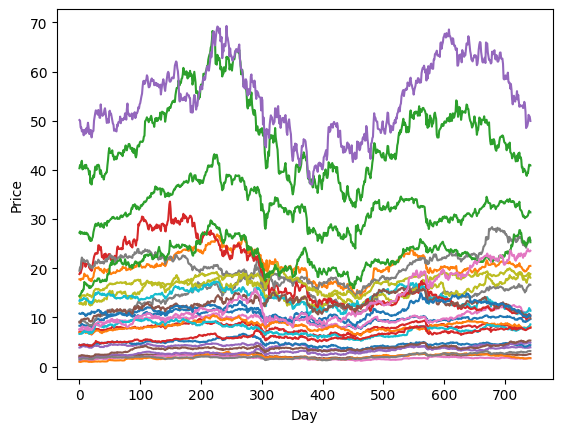

In [39]:
graph_HG = plot_prices(df, HG, CLIQUES, 'Daily_price',0)

['SAIPEM', 'MONRIF', 'SAES GETTERS', 'AUTOSTRADE MERIDIONALI', 'SABAF']


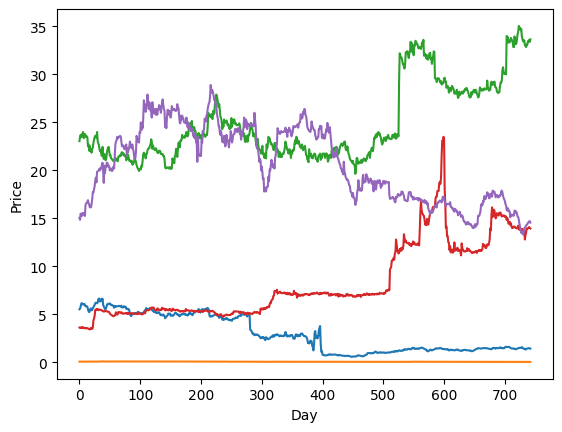

In [41]:
graph_MG = plot_prices(df, LG, CLIQUES, 'Daily_price',44)

['GAS PLUS', 'NETWEEK', 'CIA', 'NEWLAT FOOD', 'ENERVIT', 'BASTOGI', 'AUTOSTRADE MERIDIONALI', 'TXT E-SOLUTION']


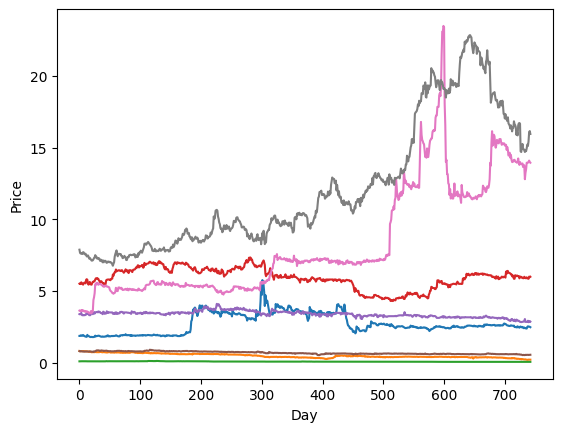

In [43]:
graph_LG = plot_prices(df, NG, CLIQUES, 'Daily_price',7) 

* From the clique obtain a table that contains the market cap, the revenue and the TRBC for each stock

In [50]:
clique_idx = iter((0,44,7)) #choosen clique: 0 for HG, 44 for LG, 7 for NG

for G in GRAPHS:
    
    result = {'Name' : [] , 'Market cap' : [], 'Revenue': [], 'TRBC' : []}
    
    for i in CLIQUES[G.graph['name']][next(clique_idx)] :
        result['Name'].append(i)
        result['Market cap'].append(round(float(df_attribute.loc[i]['Market cap']), 2))
        result['Revenue'].append(round(float(df_attribute.loc[i]['Revenue']),2))
        result['TRBC'].append(df_attribute.loc[i]['Sector'])
        
    df3 = pd.DataFrame(result)
    latex_table = df3.to_latex(index=False)
    with open(f"table_{G.graph['name']}.tex", 'w') as f:
        f.write(latex_table)

/var/folders/73/q15nk7zj12b12wgzsnb2wkwm0000gn/T/ipykernel_1384/386538382.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df3.to_latex(index=False)


* Porfolio evaluation

In [51]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting

In [61]:
#Function for plotting return-volatility of random portfolios

def plot_return_volatility(mu,S):
    
    ef = EfficientFrontier(mu, S)
    
    fig, ax = plt.subplots()
    ef_max_sharpe = ef.deepcopy()
    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

    # Find the tangency portfolio
    ef_max_sharpe.max_sharpe()
    ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
    ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

    # Generate random portfolios
    n_samples = 10000
    w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
    rets = w.dot(ef.expected_returns)
    stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
    sharpes = rets / stds
    ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

    # Output
    ax.legend()
    plt.tight_layout()
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


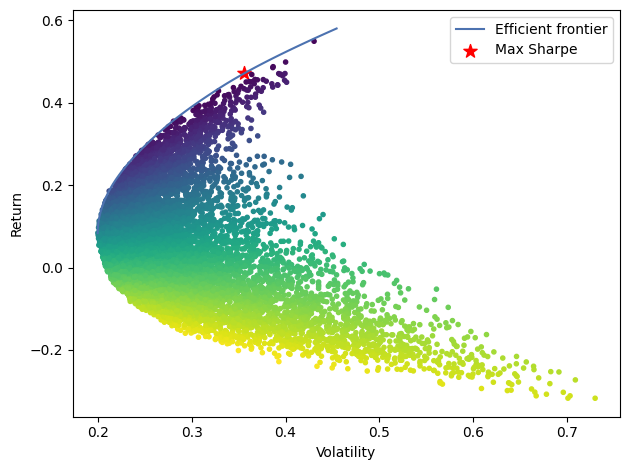

Volatility minimization for Low correlation graph gives values:
Expected annual return: 47.1%
Annual volatility: 35.6%
Sharpe Ratio: 1.27
-------------


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


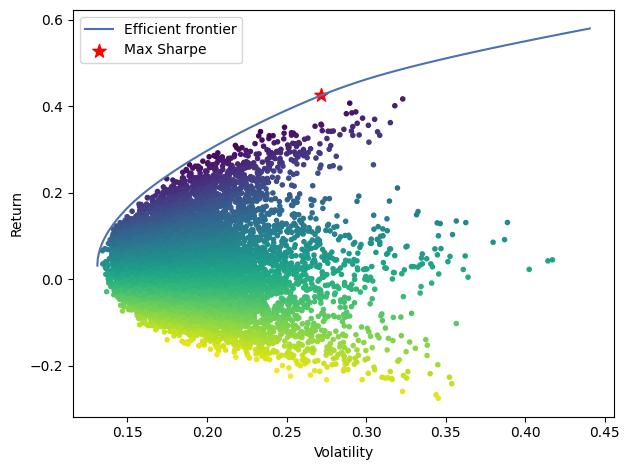

Volatility minimization for Low-negative correlation graph gives values:
Expected annual return: 42.5%
Annual volatility: 27.1%
Sharpe Ratio: 1.49
-------------


In [62]:
#Create a portofolio minimizing the volatility

clique_idx = iter((44,7)) 

for G in GRAPHS[1:]:
    
    clique = CLIQUES[G.graph['name']][next(clique_idx)]
    df_clique = df.loc[clique]
    df_clique = df_clique.drop(['Daily_price', 'Log_return', 'Correlation_coefficients'], axis=1).T
    
    #Compute the expected returns and the covariance matrix
    mu = mean_historical_return(df_clique)
    S = CovarianceShrinkage(df_clique).ledoit_wolf()
    
    #Plot return-volatility
    plot_return_volatility(mu,S)
    
    #Portfolio optimization
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()

    ef.save_weights_to_file(f"weights_{G.graph['name']}.txt")
    
    print(f"Volatility minimization for {G.graph['name']} gives values:")
    ef.portfolio_performance(verbose=True)
    print("-------------")
    

* Jaccard similarity

In [56]:
#Function for computing the Jaccard similarity

def jaccard_similarity(G, clique):
    """
    Args:
        G : Graph
        clique : list of nodes
    """
    
    node_pairs = list(combinations(clique, 2))
    jaccard_coefficients = nx.jaccard_coefficient(G, node_pairs)
    jaccard_dict = {(u, v): coefficient for u, v, coefficient in jaccard_coefficients}
    
    return jaccard_dict      
        

Mean Jaccard coefficient for High correlation graph: 0.6263323340053524


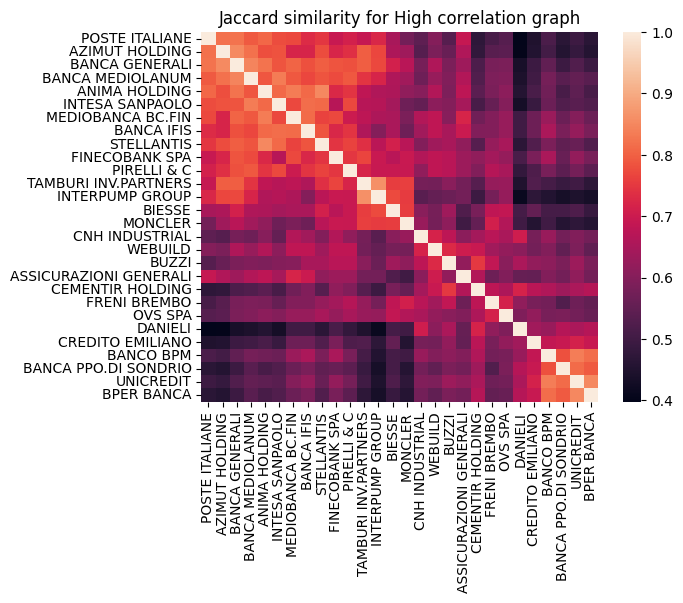

Mean Jaccard coefficient for Low correlation graph: 0.14955778099163333


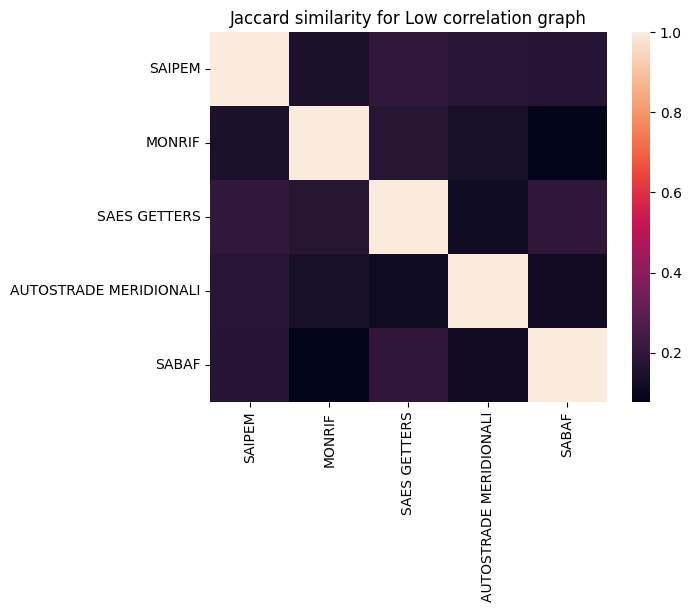

Mean Jaccard coefficient for Low-negative correlation graph: 0.2799828014352481


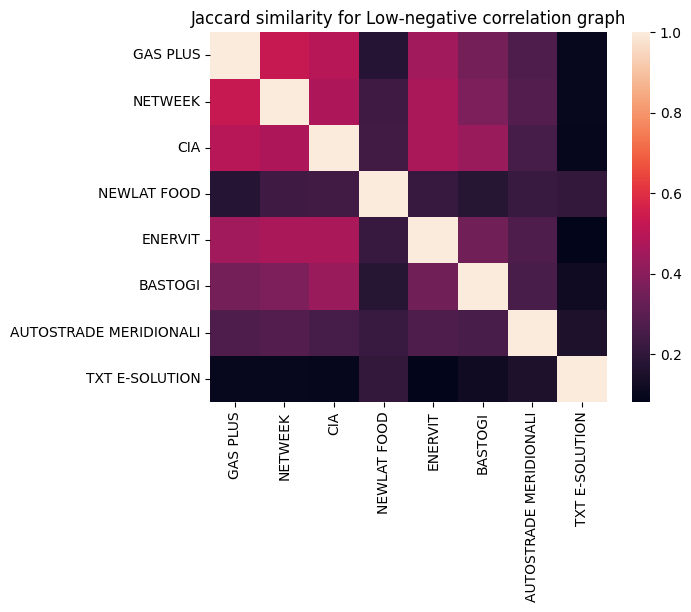

In [57]:
#Compute the Jaccard similarity for each clique and make a heatmap

clique_idx = iter((0,44,7)) 

for G in GRAPHS:
    
    clique = CLIQUES[G.graph['name']][next(clique_idx)]
    js = jaccard_similarity(G, clique)
    print(f"Mean Jaccard coefficient for {G.graph['name']}: {np.mean(list(js.values()))}")
    js_matrix = np.ones((len(clique), len(clique)))
    
    for i in range(len(clique)):
        for j in range(len(clique)):
            if i != j:
                try:
                    js_matrix[i, j] = js[(clique[i], clique[j])]
                except:
                    js_matrix[i, j] = js[(clique[j], clique[i])]
    
    sns.heatmap(js_matrix, annot=False, xticklabels=clique, yticklabels=clique)
    plt.title(f"Jaccard similarity for {G.graph['name']}")
    plt.show()
    
    